# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
pd.set_option('display.max_colwidth', 150)

In [2]:
# load messages dataset
messages = pd.read_csv('messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct


In [3]:
# check the shape of the messages dataset
messages.shape

(26248, 4)

In [4]:
# get basic information about the dataset
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
id          26248 non-null int64
message     26248 non-null object
original    10184 non-null object
genre       26248 non-null object
dtypes: int64(1), object(3)
memory usage: 820.3+ KB


In [5]:
# check the number of unique genre
messages.genre.unique()

array(['direct', 'social', 'news'], dtype=object)

In [6]:
# load categories dataset
categories = pd.read_csv('categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
1,7,related-1;request-0;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
2,8,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
3,9,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-1;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
4,12,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...


In [7]:
# check the shape of the categories data
categories.shape

(26248, 2)

### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [8]:
# check the number of unique ids in each dataframe
print(f'Number of unique ids in messages dataframe: {messages.id.nunique()}')
print(f'Number of unique ids in categories dataframe: {categories.id.nunique()}')
print(f'Number of common ids: {np.sum(messages.id.unique() == categories.id.unique())}')

Number of unique ids in messages dataframe: 26180
Number of unique ids in categories dataframe: 26180
Number of common ids: 26180


In [9]:
# Check duplicate entries in the messages dataframe
messages[messages.duplicated(keep = False)]

,id,message,original,genre
162,202,?? port au prince ?? and food. they need goverment aid and international aid thak you. god bless haiti,"p bay pap la syen ak manje. Yo bezwen ed gouvenman an ak d entenasyonal. Mesi, BonDye beni Ayiti.",direct
163,202,?? port au prince ?? and food. they need goverment aid and international aid thak you. god bless haiti,"p bay pap la syen ak manje. Yo bezwen ed gouvenman an ak d entenasyonal. Mesi, BonDye beni Ayiti.",direct
655,804,elle est vraiment malade et a besoin d'aide. utilisez mon numero de tlphone pour obtenir plus de renseignements. Nous attendons une reponse. Aucun...,she is really sick she need your help. please use my phone number to get more informations about her. We waiting for your answers.,direct
656,804,elle est vraiment malade et a besoin d'aide. utilisez mon numero de tlphone pour obtenir plus de renseignements. Nous attendons une reponse. Aucun...,she is really sick she need your help. please use my phone number to get more informations about her. We waiting for your answers.,direct
709,862,What is the address of the radio station? I ask because I need to drop off a file for the committee we created. Thanks in advance!,Ki adres radyo a? Paske m bezwen al depoze dosye ki bay detay sou komite nou fmea. Mesi davans!,direct
710,862,What is the address of the radio station? I ask because I need to drop off a file for the committee we created. Thanks in advance!,Ki adres radyo a? Paske m bezwen al depoze dosye ki bay detay sou komite nou fmea. Mesi davans!,direct
1407,1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct
1408,1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct
2130,2446,How much money did TV Latino American collect in Miami,Konbyen kob tv latino america ranmase miami,direct
2131,2446,How much money did TV Latino American collect in Miami,Konbyen kob tv latino america ranmase miami,direct


In [10]:
# Check duplicate entries in the categories dataframe
categories[categories.duplicated(keep = False)]

,id,categories
655,804,related-2;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
656,804,related-2;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
2130,2446,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
2131,2446,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
2792,3217,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-1...
2793,3217,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-1...
3851,4412,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
3852,4412,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
4629,5265,related-2;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
4630,5265,related-2;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...


- The messages and categories dataframes have equal number of unique ids.
- Messages dataframe has **135 duplicate entries** while categories dataframe has **63 duplicate entries**.

In [11]:
# merge datasets
df = pd.merge(messages, categories, on = 'id', how = 'inner')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region...,direct,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,related-1;request-1;offer-0;aid_related-1;medical_help-0;medical_products-1;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0...


In [12]:
# check the shape of the resulting dataset
df.shape

(26386, 5)

- The messages and categories dataframe have **26248 entries** while the dataframe resulted from merging these two have **26386** entries

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [13]:
# create a dataframe of the 36 individual category columns
categories = categories.categories.str.split(';', n = -1, expand = True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [14]:
# select the first row of the categories dataframe
row = categories.iloc[0, :]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = row.apply(lambda x: x[:-2])
print(category_colnames)

0                    related
1                    request
2                      offer
3                aid_related
4               medical_help
5           medical_products
6          search_and_rescue
7                   security
8                   military
9                child_alone
10                     water
11                      food
12                   shelter
13                  clothing
14                     money
15            missing_people
16                  refugees
17                     death
18                 other_aid
19    infrastructure_related
20                 transport
21                 buildings
22               electricity
23                     tools
24                 hospitals
25                     shops
26               aid_centers
27      other_infrastructure
28           weather_related
29                    floods
30                     storm
31                      fire
32                earthquake
33                      cold
34            

In [15]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [16]:
# iterate over the columns of categories 
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].str[-1]
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [17]:
# drop the original categories column from `df`
df.drop('categories', axis = 1, inplace = True)
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct
4,12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct


In [18]:
# display formatting
pd.set_option('display.max_columns', 40)

# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis = 1)

# set id as the index of the dataframe
df.set_index('id', inplace = True)

# display dataframe
df.head()

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Weather update - a cold front from Cuba that could pass over Haiti,Un front froid se retrouve sur Cuba ce matin. Il pourrait traverser Haiti demain. Des averses de pluie isolee sont encore prevues sur notre region...,direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ak timoun yo. Mesi se john jean depi Monben kwochi.",direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.,direct,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,"says: west side of Haiti, rest of the country today and tonight",facade ouest d Haiti et le reste du pays aujourd hui et ce soir,direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [19]:
# check the number of duplicates in the dataframe
df[df.duplicated(keep = False)]

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,What is the address of the radio station? I ask because I need to drop off a file for the committee we created. Thanks in advance!,Ki adres radyo a? Paske m bezwen al depoze dosye ki bay detay sou komite nou fmea. Mesi davans!,direct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862,What is the address of the radio station? I ask because I need to drop off a file for the committee we created. Thanks in advance!,Ki adres radyo a? Paske m bezwen al depoze dosye ki bay detay sou komite nou fmea. Mesi davans!,direct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1652,"please we need water, food and tents, we have 101 chlidren. .. please come rescue","p jwen dlo, manje, tant pou nou demi nou gen 101 timoun vinn sove n",direct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5265,(Delmas 33 Charboniere infomatyon s'il vous plait.),"Delmas 33, charbonniere, information please.",direct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5265,(Delmas 33 Charboniere infomatyon s'il vous plait.),"Delmas 33, charbonniere, information please.",direct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5643,Good evening. we are writing to ask you for a little help in the Sibert area. We are calling for something to eat. We haven't eaten anything yet. ...,"Bonswa nou ekri'w se pou nou mande'w yon ti d pou zon sibert a sak rele bagay manje a nou poko goute anyen, nap mande nou tanpri, fe yon kichy pou...",direct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# drop duplicates
df.drop_duplicates(inplace = True)

# check number of duplicates
df[df.duplicated(keep = False)]

,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [21]:
# check the shape of the dataframe after dropping duplicates
df.shape

(26345, 39)

In [22]:
# check the percentage of null values in each column of the dataframe
round(100 * df.isnull().sum() / len(df), 2)

message                    0.00
original                  61.20
genre                      0.00
related                    0.52
request                    0.52
offer                      0.52
aid_related                0.52
medical_help               0.52
medical_products           0.52
search_and_rescue          0.52
security                   0.52
military                   0.52
child_alone                0.52
water                      0.52
food                       0.52
shelter                    0.52
clothing                   0.52
money                      0.52
missing_people             0.52
refugees                   0.52
death                      0.52
other_aid                  0.52
infrastructure_related     0.52
transport                  0.52
buildings                  0.52
electricity                0.52
tools                      0.52
hospitals                  0.52
shops                      0.52
aid_centers                0.52
other_infrastructure       0.52
weather_

- Original column has **61.20%** null values in the dataset. 
- Let's drop this column from the dataset

In [23]:
df.drop('original', axis = 1, inplace = True)

# display rows with null values
df[df.isna().any(axis = 1)]

,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30112,The 1 July meeting of the Support and Follow-up Group on Mali in Bamako and the presentation of the United Nations Integrated Strategy to the Coun...,news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30113,"Japan's overseas missions are accepting relief money from private organizations, etc., of foreign countries.",news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30114,"According to officials, Kabul River and Swat River and several big seasonal streams in northern Pakistan were either overflowing or touching dange...",news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30115,"The gross relief food requirements for June-December 2004 stand at 327,000 tons, and confirmed contributions to WFP, NGOs and bilaterals to the Go...",news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30116,"Authorities have built tent compounds in flattened mountain towns along the fault line to keep refugees from flooding the cities, but have cordone...",news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30117,"Two of the dead were so badly mutilated that no one had been able to identify them and they lay unclaimed, he said.",news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30118,"Representatives of the GOM, United Nations Development Programme, WFP, UNICEF, USAID, United Nations Food and Agriculture Organization and Doctors...",news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30119,"The health-care worker referred the grandmother and child to the Fousseyni Daou Hospital, in the same city, where she was admitted to the paediatr...",news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30121,"Jongwe welcomed a statement by eight Commonwealth foreign ministers in London on Tuesday condemning ""political violence, loss of life, illegal occ...",news,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- In **138** rows above, all the category columns have null values. The genre of all these messages is news.

In [24]:
# drop the rows with null values
df.dropna(inplace = True)

df[df.isna().any(axis = 1)]

,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


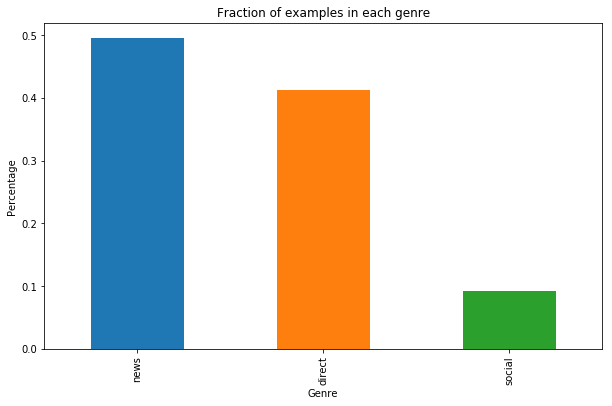

In [25]:
# check the distribution of genre in the dataset
df.genre.value_counts(normalize = True).plot(kind = 'bar', 
                             title = 'Fraction of examples in each genre',
                             figsize = (10, 6))
plt.xlabel('Genre')
plt.ylabel('Percentage');

- Approximately **50%** examples belong to **the news genre**
- **40%** examples belong to the **direct genre**
- Only **10%** examples belong to the **social genre**. This shows that the dataset is not balanced.

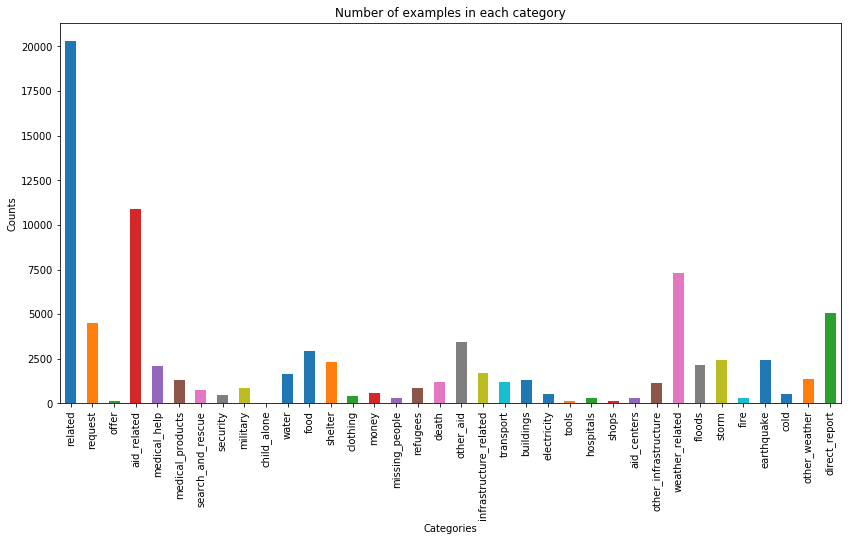

In [26]:
# check the distribution of examples in each category
df.iloc[:, 2:].sum().plot(kind = 'bar', 
                          title = 'Number of examples in each category',
                          figsize = (14, 7))
plt.xlabel('Categories')
plt.ylabel('Counts');

In [27]:
# Count the number of examples in each category
df.iloc[:, 2:].apply(pd.Series.value_counts).T

,0.0,1.0,2.0
related,6101.0,19914.0,192.0
request,21727.0,4480.0,NaN
offer,26088.0,119.0,NaN
aid_related,15329.0,10878.0,NaN
medical_help,24120.0,2087.0,NaN
medical_products,24893.0,1314.0,NaN
search_and_rescue,25483.0,724.0,NaN
security,25736.0,471.0,NaN
military,25347.0,860.0,NaN
child_alone,26207.0,NaN,NaN


- All categories in the dataset have **binary values either 0 or 1** except **related column that has third value as 2**.
- This could be due to manual error or some other sources.

In [28]:
# Number of examples in each genre where related column has a value of 2
df[df.related == 2]['genre'].value_counts()

direct    129
social     45
news       18
Name: genre, dtype: int64

In [29]:
# Replace value of 2 in related column with 1
df.loc[df[df.related == 2].index, 'related'] = 1

df.iloc[:, 2:].apply(pd.Series.value_counts).T

,0.0,1.0
related,6099.0,20108.0
request,21727.0,4480.0
offer,26088.0,119.0
aid_related,15329.0,10878.0
medical_help,24120.0,2087.0
medical_products,24893.0,1314.0
search_and_rescue,25483.0,724.0
security,25736.0,471.0
military,25347.0,860.0
child_alone,26207.0,NaN


In [30]:
# check the average number of words in each message
print(f'Average number of words in message column: \
      {df.message.apply(lambda x: len(x.split())).mean()}')
print(f'Average number of characters in message column: \
      {df.message.apply(len).mean()}')

print(f"Average number of words in message column in news genre: \
      {df[df.genre == 'news']['message'].apply(lambda x: len(x.split())).mean()}")
print(f"Average number of characters in message column in news genre: \
      {df[df.genre == 'news']['message'].apply(len).mean()}")

print(f"Average number of words in message column in direct genre: \
      {df[df.genre == 'direct']['message'].apply(lambda x: len(x.split())).mean()}")
print(f"Average number of characters in message column in direct genre: \
      {df[df.genre == 'direct']['message'].apply(len).mean()}")

print(f"Average number of words in message column in social genre: \
      {df[df.genre == 'social']['message'].apply(lambda x: len(x.split())).mean()}")
print(f"Average number of characters in message column in social genre: \
      {df[df.genre == 'social']['message'].apply(len).mean()}")

Average number of words in message column:       23.839470370511695
Average number of characters in message column:       144.58988056626092
Average number of words in message column in news genre:       30.115811373092928
Average number of characters in message column in news genre:       193.30759747264602
Average number of words in message column in direct genre:       17.05662817551963
Average number of characters in message column in direct genre:       90.04951501154734
Average number of words in message column in social genre:       20.499168053244592
Average number of characters in message column in social genre:       127.17762063227953


In [31]:
# Check the distribution of each category for each genre
df.groupby('genre')[df.columns[2:]].sum().T

genre,direct,news,social
related,7394.0,10625.0,2089.0
request,3671.0,602.0,207.0
offer,36.0,65.0,18.0
aid_related,4271.0,5838.0,769.0
medical_help,586.0,1415.0,86.0
medical_products,423.0,794.0,97.0
search_and_rescue,223.0,439.0,62.0
security,137.0,291.0,43.0
military,44.0,797.0,19.0
child_alone,0.0,0.0,0.0


### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [33]:
engine = create_engine('sqlite:///messages.db')
df.to_sql('messages_data', engine, index = False, if_exists = 'replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.